In [1]:
import numpy as np
import scipy as sp
import suite2p as s2p
import TwoPUtils
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as linreg

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [9]:
# set mouse and session info

basedir = "/mnt/BigDisk/2P_scratch"
mouse = '4467975.2'

sess_folder = os.path.join(basedir, mouse, '29_09_2020','YMaze_LNovel',"YMaze_LNovel_001_003")
s2p_folder = os.path.join(sess_folder, 'suite2p','plane0')

             

In [10]:
ops = np.load(os.path.join(s2p_folder,"ops.npy"),allow_pickle=True).all()
stats = np.load(os.path.join(s2p_folder,"stat.npy"),allow_pickle=True)
iscell = np.load(os.path.join(s2p_folder,"iscell.npy"),allow_pickle=True)


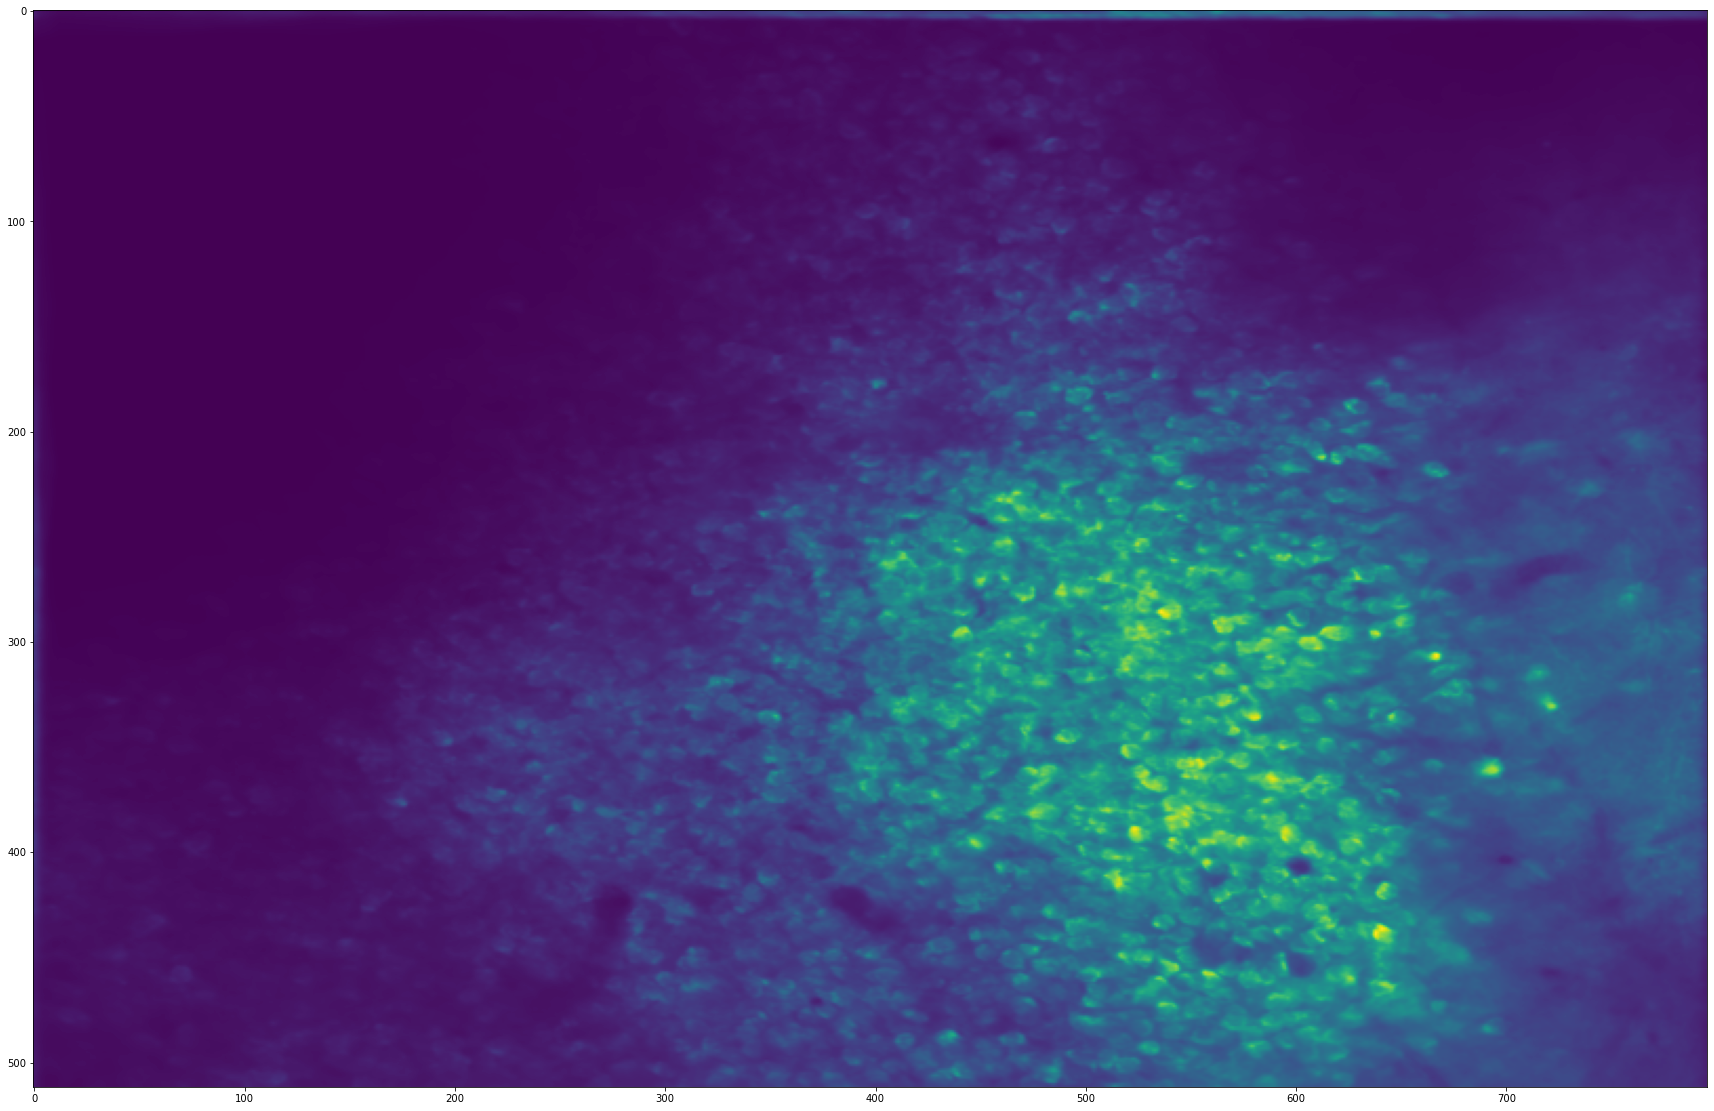

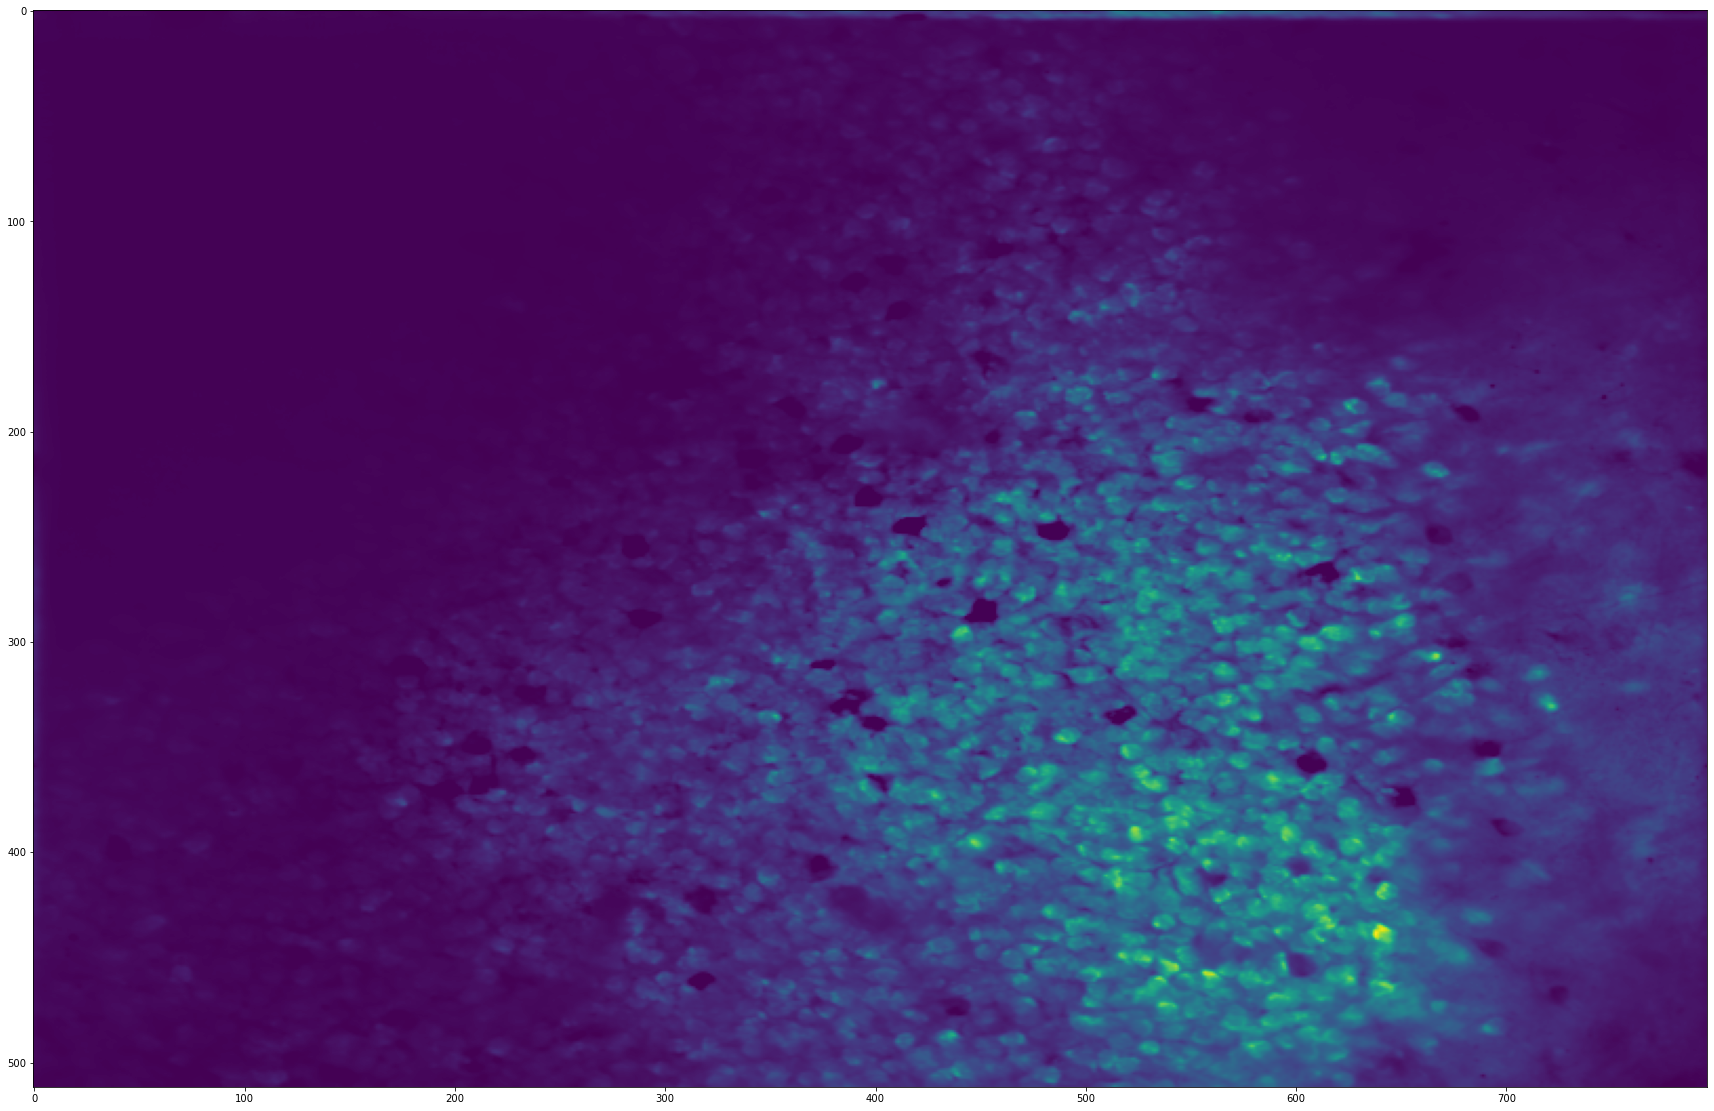

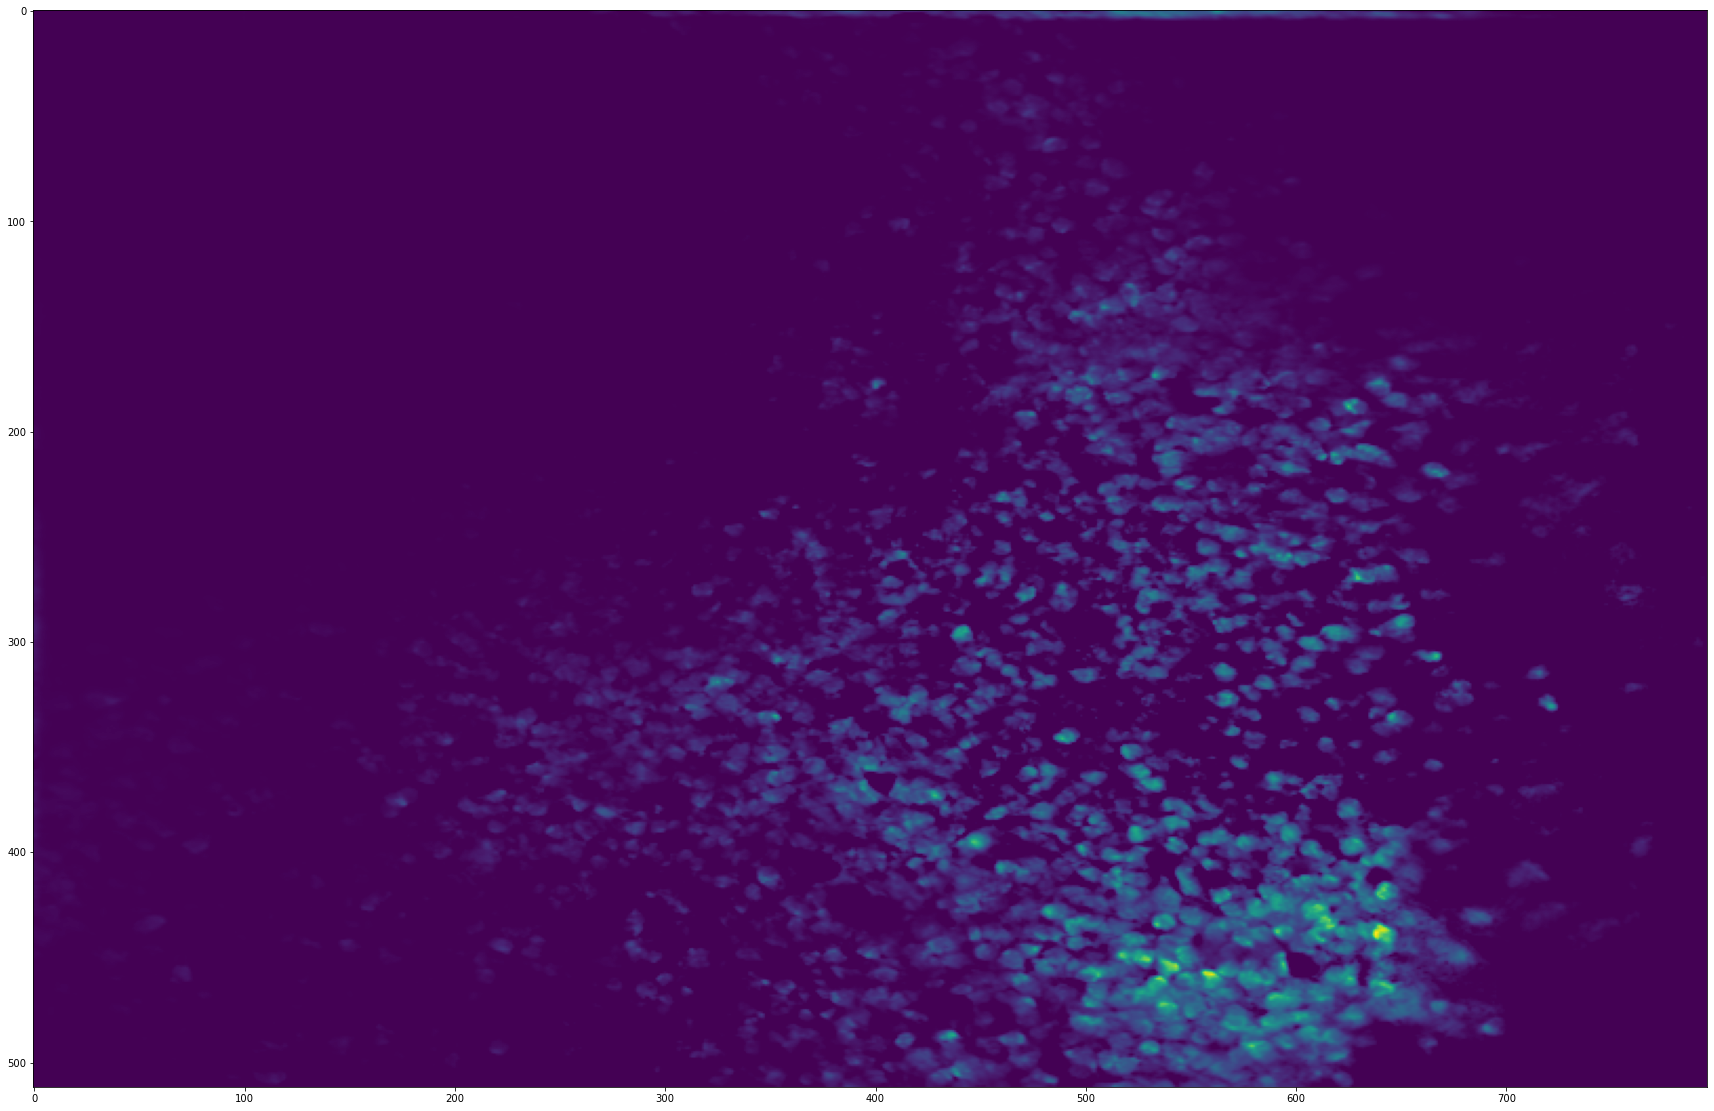

In [12]:
fig,ax = plt.subplots(figsize=[30,30])
ax.imshow(ops['meanImg_chan2'])

fig,ax = plt.subplots(figsize=[30,30])
ax.imshow(np.maximum(ops['meanImg_chan2'] - .7*ops['meanImg'],0))

fig,ax = plt.subplots(figsize=[30,30])
ax.imshow(ops['meanImg_chan2_corrected'])

In [13]:
redcell_prob = np.zeros([stats.shape[0],2])
redcorr = 1*(ops['meanImg_chan2_corrected']>0)
for i, roi in enumerate(stats):
#     roi_im = np.zeros(ops['meanImg'].shape)
    prob = redcorr[roi['ypix'],roi['xpix']].mean()
    redcell_prob[i,:] = [(prob)>.3, prob]


(array([71., 21., 17., 32., 28., 32., 28., 40., 62., 89.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

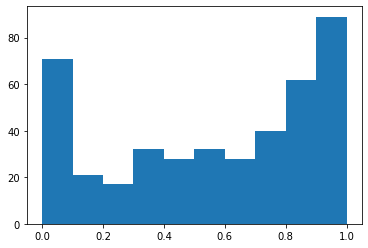

In [14]:
fig,ax=plt.subplots()
ax.hist(redcell_prob[:,1])

In [15]:
redcell_prob.sum(axis=0)

array([311.        , 236.49389734])

In [16]:
iscell[:,0]=redcell_prob[:,0]

# for cell in range(iscell.shape[0]):
#     iscell[cell,0]=np.minimum(iscell[cell,0],redcell_prob[cell,0])

In [17]:
np.save(os.path.join(s2p_folder,'iscell.npy'),iscell)